# Exponential Filter
The [exponential filter](https://en.wikipedia.org/wiki/Exponential_smoothing) is generally written in the form

$$y[n] = \alpha~x[n]+(1-\alpha)~y[n-1]$$

where $x[n]$ and $y[n]$ are the input and output signals at time $n$. 

The time constant of an exponential moving average is the amount of time for the smoothed response to reach $1-\frac{1}{e}\approx0.63\%$ of the input signal. The relationship between this time constant $\tau$ and the smoothing factor $\alpha$ is given by the formula:

$$\alpha = 1-\exp(\frac{-\Delta T}{\tau})$$

where $\Delta T$ is the sampling time (inverse of sampling frequency) and $\tau$ is the filter time constant.

The general form of the IIR difference equation is

$$y[n]=\sum_{b_k=0}^{M}b_k~x[n-k]-\sum_{l=1}^{N} a_l~y[n-l]$$

where $N$ is the feedback filter order, $M$ is the feedforward filter order, and it is assumed that $a_0=1$. Note that the feedback coefficients $\alpha_l$ for $l=1\dots N$ are negative in the equation above.
It can be seen that the exponential filter fits the form of an IIR filter where,

$$a_0 = 1$$
$$a_1=-(1-\alpha)$$
$$b_0=\alpha$$

In [14]:
import numpy as np
from scipy.signal import lfilter, freqz

%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
Fs = 8000
Fs_nyq = Fs / 2
T = 1 / Fs

exp_list = range(-1, -5, -1)
tau_array = np.array([10**xx for xx in exp_list])
alpha_array = 1 - np.exp(-T/tau_array)

In [20]:
b = np.array([[alpha] for alpha in alpha_array])
a = np.array([[1, -(1-alpha)] for alpha in alpha_array])  # notice that the feedback constants 1-N are negative in the IIR filter equation above
wh_list = [freqz(b, a, 8192, Fs) for b,a in zip(b, a)]

Text(0.5, 1.0, 'Filer Frequency Response')

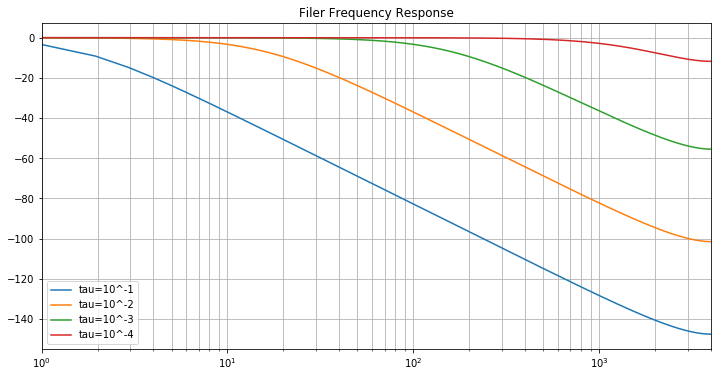

In [22]:
f = plt.figure(figsize=(12, 6))
ax = f.add_subplot(1, 1, 1)
for wh, e in zip(wh_list, exp_list):
    w, h = wh
    ax.plot(w*(Fs/(2*np.pi)), 20*np.log(np.abs(h)), label='tau=10^{}'.format(e))
ax.set_xscale('log')
ax.set_xlim([1, Fs_nyq])
ax.grid(which='both', axis='both')
ax.legend()
ax.set_title('Filer Frequency Response')

In [23]:
len_s = 0.25
xx = np.arange(0, Fs * len_s - 1) * T
yy = np.ones_like(xx)

yy_filt = [lfilter(b, a, yy) for b, a in zip(b, a)]

Text(0.5, 1.0, 'Filer Step Response Using IIR Filter')

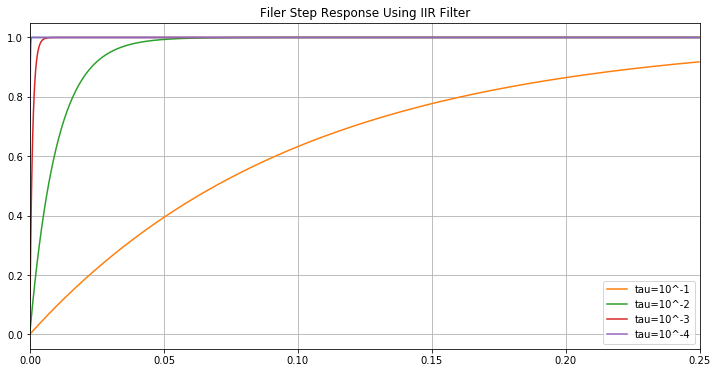

In [38]:
f = plt.figure(figsize=(12, 6))
ax = f.add_subplot(1, 1, 1)
ax.plot(xx, yy)
for yy_f, e in zip(yy_filt, exp_list):
    ax.plot(xx, yy_f, label='tau=10^{}'.format(e))
ax.set_xlim([0, len_s])
ax.grid(which='both', axis='both')
ax.legend()
ax.set_title('Filer Step Response Using IIR Filter')

In [39]:
def expf(xx, alpha=1.0):
    yy = np.zeros_like(xx)
    for ii in range(1, len(xx)):
        yy[ii] = alpha * xx[ii] + (1-alpha) * yy[ii-1]
    return yy

Text(0.5, 1.0, 'Filer Step Response using Exponential Filter')

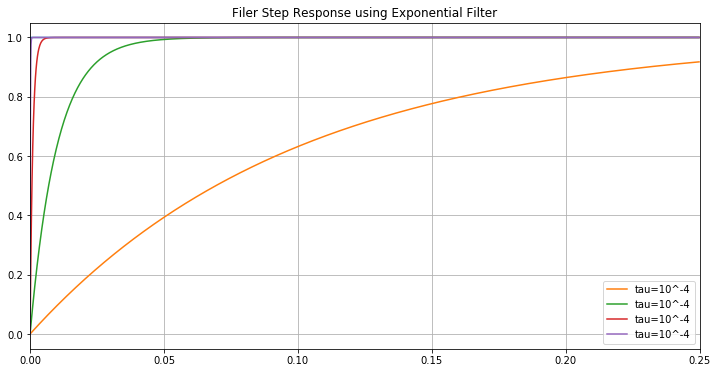

In [40]:
f = plt.figure(figsize=(12, 6))
ax = f.add_subplot(1, 1, 1)
ax.plot(xx, yy)
for alpha in alpha_array:
    ax.plot(xx, expf(yy, alpha), label='tau=10^{}'.format(e))
ax.set_xlim([0, len_s])
ax.grid(which='both', axis='both')
ax.legend()
ax.set_title('Filer Step Response using Exponential Filter')